In [383]:
from google.colab import files
uploaded = files.upload()

import pandas as pd

df = pd.read_csv('Financials.csv')

Saving Financials.csv to Financials (2).csv


In [384]:
df.rename(columns = {' Product ':'Product', ' Discount Band ': 'Discount Band',' Units Sold ': 'Units Sold', ' Manufacturing Price ': 'Manufacturing Price',' Sale Price ':'Sale Price' , ' Gross Sales ': 'Gross Sales', ' Discounts ': 'Discounts',
       '  Sales ': 'Sales', ' COGS ':'COGS',' Profit ': 'Profit',' Month Name ':'Month Name'}, inplace = True)

df = df.replace({'\$': ''}, regex = True)
df = df.replace({'\,': ''}, regex = True)
df = df.replace({'\-': '0'}, regex = True)

In [385]:
df['Discount Band'].unique()

array([' None ', ' Low ', ' Medium ', ' High '], dtype=object)

In [392]:
import numpy as np

# Shuffle the dataset
df = df.sample(frac = 1)

df_discount_0 = df[df['Discount Band'] == ' None ']
df_discount_1 = df[df['Discount Band'] == ' Low ']
df_discount_2 = df[df['Discount Band'] == ' Medium ']
df_discount_3 = df[df['Discount Band'] == ' High ']

# print(len(df_discount_0))
# print(len(df_discount_1))
# print(len(df_discount_2))
# print(len(df_discount_3))

df_discount_low = pd.concat([df_discount_0, df_discount_1])
df_discount_high = pd.concat([df_discount_2, df_discount_3])

df_discount_low_sampled_server_one = df_discount_low.sample(frac = 0.85, random_state = 42)
df_discount_high_sampled_server_one = df_discount_high.sample(frac = 0.15, random_state = 42)

df_discount_low_sampled_server_two = df_discount_low.sample(frac = 0.15, random_state = 42)
df_discount_high_sampled_server_two = df_discount_high.sample(frac = 0.85, random_state = 42)

server_one = pd.concat([df_discount_low_sampled_server_one, df_discount_high_sampled_server_one])
server_two = pd.concat([df_discount_low_sampled_server_two, df_discount_high_sampled_server_two])

# names = df['Product'].unique()

# feature = 'Segment'
# feature = 'Product'
# random_selection = np.random.choice(df[feature].unique(), size = 2, replace = False)
# random_selection = [' Paseo ', ' VTT ']

# Divide the dataframe into two equal parts
# num_rows = len(df)
# midpoint = num_rows // 2

# server_one = df.iloc[:midpoint]
# server_two = df.iloc[midpoint:]

In [381]:
# server_one = df[df[feature].isin(random_selection)]
# server_two = df[~df[feature].isin(random_selection)]

# server_one = df[df['Month Number'].isin([1, 2, 3, 4, 5, 6])]
# server_two = df[df['Month Number'].isin([7, 8, 9, 10, 11, 12])]

In [203]:
# server_one.to_csv('server_one_dataframe_equal_division.csv', index = False)
# files.download('server_one_dataframe_equal_division.csv')

# server_two.to_csv('server_two_dataframe_equal_division.csv', index = False)
# files.download('server_two_dataframe_equal_division.csv')

In [393]:
from scipy.stats import kstest

sample1 = server_one['Discount Band']
sample2 = server_two['Discount Band']
ks_statistic, p_value = kstest(sample1, sample2)

print("KS statistic:", ks_statistic)
print("p-value:", p_value)

sample1 = server_one['Units Sold']
sample2 = server_two['Units Sold']
ks_statistic, p_value = kstest(sample1, sample2)

print("KS statistic:", ks_statistic)
print("p-value:", p_value)

KS statistic: 0.3263302849475654
p-value: 8.854080211456667e-16
KS statistic: 0.11226651601285266
p-value: 0.030683042998318612


In [394]:
server_one.to_csv('server_one_dataframe_division_mostly_low_discount.csv', index = False)
files.download('server_one_dataframe_division_mostly_low_discount.csv')

server_two.to_csv('server_two_dataframe_division_mostly_high_discount.csv', index = False)
files.download('server_two_dataframe_division_mostly_high_discount.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [340]:
# print(random_selection)

['Enterprise' 'Channel Partners']


In [395]:
# Canada, Mexico, and USA in North America and France and Germany in Europe
north_america_df = df[df['Country'].isin(['Canada', 'Mexico', 'USA'])]
europe_df = df[df['Country'].isin(['France', 'Germany'])]

In [396]:
# north_america_df.to_csv('server_one_dataframe_north_america.csv', index = False)
# files.download('server_one_dataframe_north_america.csv')

# europe_df.to_csv('server_two_dataframe_europe_df.csv', index = False)
# files.download('server_two_dataframe_europe_df.csv')

In [397]:
sample1 = north_america_df['Discount Band']
sample2 = europe_df['Discount Band']
ks_statistic, p_value = kstest(sample1, sample2)

print("KS statistic:", ks_statistic)
print("p-value:", p_value)

sample1 = north_america_df['Units Sold']
sample2 = europe_df['Units Sold']
ks_statistic, p_value = kstest(sample1, sample2)

print("KS statistic:", ks_statistic)
print("p-value:", p_value)

KS statistic: 0.08571428571428572
p-value: 0.25541286258739365
KS statistic: 0.07142857142857142
p-value: 0.4734123261503022


<ipython-input-399-58d6be06089b>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x_labels, fontsize = 25)
<ipython-input-399-58d6be06089b>:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(x_labels, fontsize = 25)


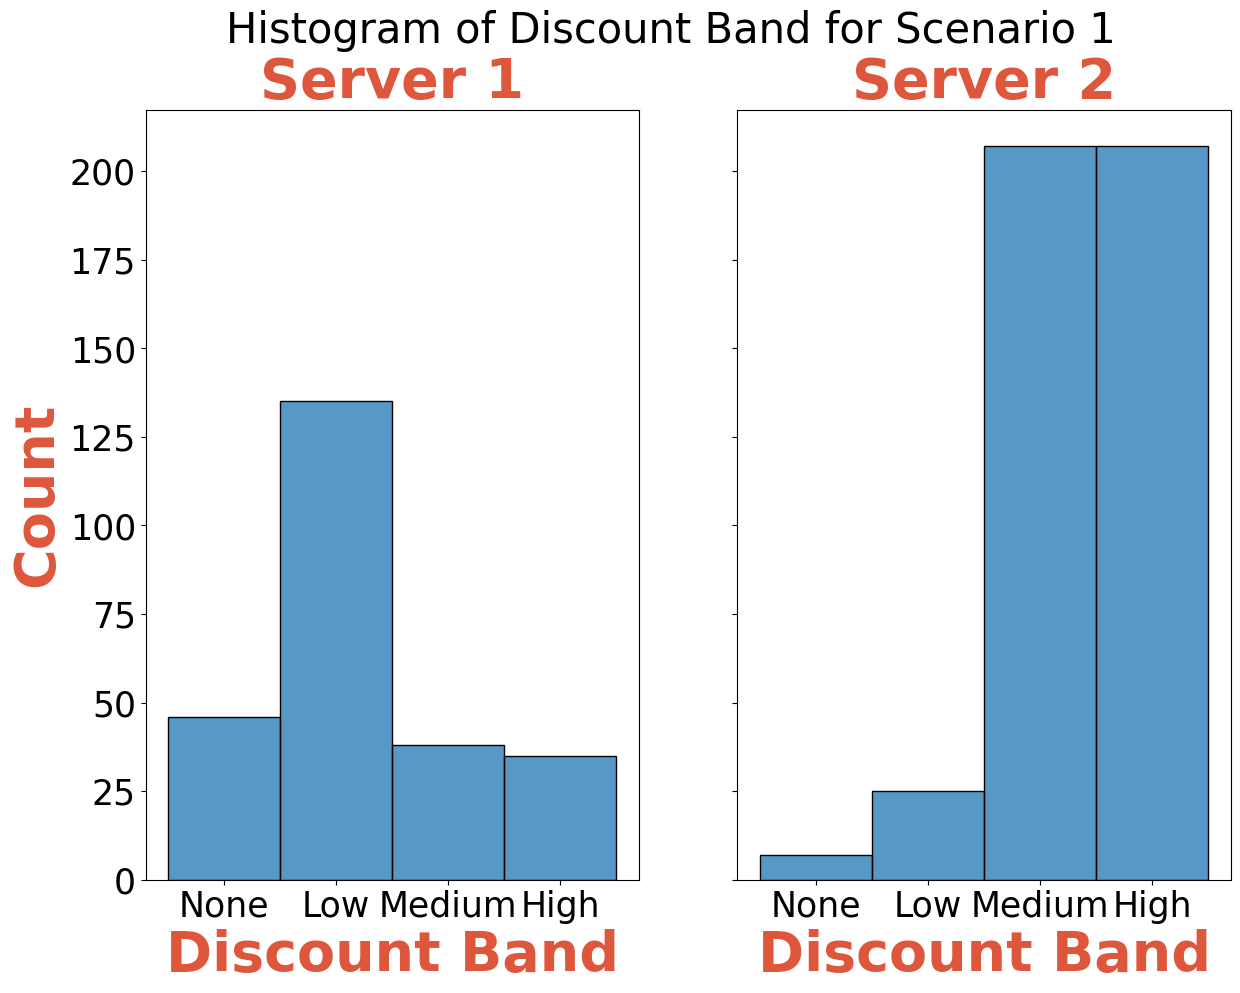

In [399]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up subplots
fig, (ax1, ax2) = plt.subplots(1, 2, sharex = True, sharey = True, figsize = (14, 10))

# Plot original data distribution plot
sns.histplot(server_one['Discount Band'], ax = ax1)
# ax1.set_title('Advanced Degree')

ax1.set_title('Server 1',
          fontsize = 40,
          weight = 'semibold',
          color = '#de573c');
ax1.set_ylabel('Count',
          fontsize = 40,
          weight = 'semibold',
          color = '#de573c')
ax1.set_xlabel('Discount Band',
          fontsize = 40,
          weight = 'semibold',
          color = '#de573c');

x_labels = ['None', 'Low', 'Medium', 'High']
ax1.set_xticklabels(x_labels, fontsize = 25)

# Plot synthetic data distribution plot
sns.histplot(server_two['Discount Band'], ax = ax2)
# ax2.set_title('Intemediate Degree')

ax2.set_title('Server 2',
          fontsize = 40,
          weight = 'semibold',
          color = '#de573c');
ax2.set_ylabel('Count',
          fontsize = 40,
          weight = 'semibold',
          color = '#de573c')
ax2.set_xlabel('Discount Band',
          fontsize = 40,
          weight = 'semibold',
          color = '#de573c');

ax2.set_xticklabels(x_labels, fontsize = 25)

xmin = min(ax1.get_xlim()[0], ax2.get_xlim()[0])
xmax = max(ax1.get_xlim()[1], ax2.get_xlim()[1])
ymin = min(ax1.get_ylim()[0], ax2.get_ylim()[0])
ymax = max(ax1.get_ylim()[1], ax2.get_ylim()[1])
ax1.set_xlim([xmin, xmax])
ax1.set_ylim([ymin, ymax])
ax2.set_xlim([xmin, xmax])
ax2.set_ylim([ymin, ymax])

plt.suptitle('Histogram of Discount Band for Scenario 1')
plt.rcParams.update({'font.size': 25})

# plt.savefig('histogram_discount_band_scenario_1.png')
# files.download('histogram_discount_band_scenario_1.png')

<ipython-input-400-d80268b6688f>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x_labels, fontsize = 25)
<ipython-input-400-d80268b6688f>:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(x_labels, fontsize = 25)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

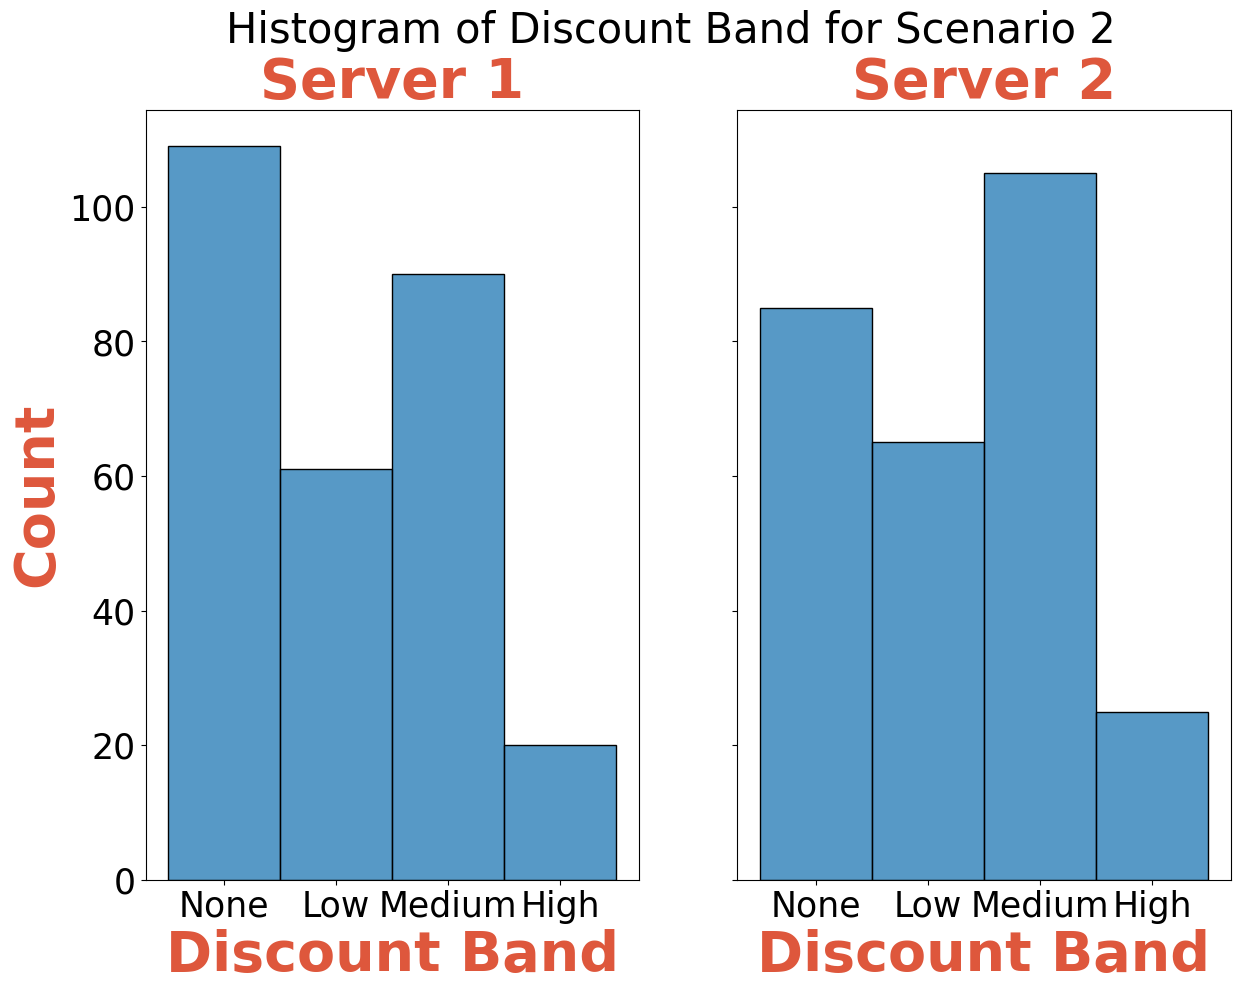

In [400]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up subplots
fig, (ax1, ax2) = plt.subplots(1, 2, sharex = True, sharey = True, figsize = (14, 10))

# Plot original data distribution plot
sns.histplot(north_america_df['Discount Band'], ax = ax1)
# ax1.set_title('Advanced Degree')

ax1.set_title('Server 1',
          fontsize = 40,
          weight = 'semibold',
          color = '#de573c');
ax1.set_ylabel('Count',
          fontsize = 40,
          weight = 'semibold',
          color = '#de573c')
ax1.set_xlabel('Discount Band',
          fontsize = 40,
          weight = 'semibold',
          color = '#de573c');

x_labels = ['None', 'Low', 'Medium', 'High']
ax1.set_xticklabels(x_labels, fontsize = 25)

# Plot synthetic data distribution plot
sns.histplot(europe_df['Discount Band'], ax = ax2)
# ax2.set_title('Intemediate Degree')

ax2.set_title('Server 2',
          fontsize = 40,
          weight = 'semibold',
          color = '#de573c');
ax2.set_ylabel('Count',
          fontsize = 40,
          weight = 'semibold',
          color = '#de573c')
ax2.set_xlabel('Discount Band',
          fontsize = 40,
          weight = 'semibold',
          color = '#de573c');

ax2.set_xticklabels(x_labels, fontsize = 25)

xmin = min(ax1.get_xlim()[0], ax2.get_xlim()[0])
xmax = max(ax1.get_xlim()[1], ax2.get_xlim()[1])
ymin = min(ax1.get_ylim()[0], ax2.get_ylim()[0])
ymax = max(ax1.get_ylim()[1], ax2.get_ylim()[1])
ax1.set_xlim([xmin, xmax])
ax1.set_ylim([ymin, ymax])
ax2.set_xlim([xmin, xmax])
ax2.set_ylim([ymin, ymax])

plt.suptitle('Histogram of Discount Band for Scenario 2')
plt.rcParams.update({'font.size': 25})

plt.savefig('histogram_discount_band_continent_division.png')
files.download('histogram_discount_band_continent_division.png')